In [3]:

import numpy as np
import pandas as pd
import shap

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
df.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:

X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [7]:

xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

xgb.feature_importances_


array([4.4450927e-01, 1.4768447e-01, 1.7067093e-02, 2.3260780e-03,
       3.8176128e-01, 5.5183098e-03, 0.0000000e+00, 5.7382937e-07,
       2.0235122e-07, 1.1327403e-03], dtype=float32)

<BarContainer object of 10 artists>

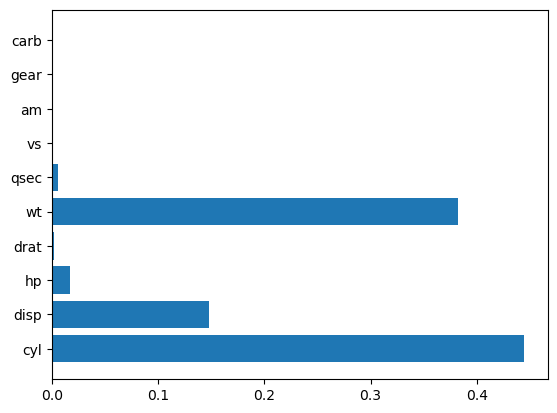

In [8]:

plt.barh(X.columns, xgb.feature_importances_)


Text(0.5, 0, 'Xgboost Feature Importance')

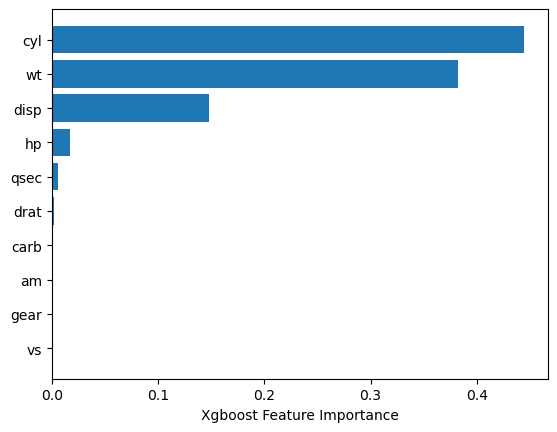

In [10]:

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


Text(0.5, 0, 'Permutation Importance')

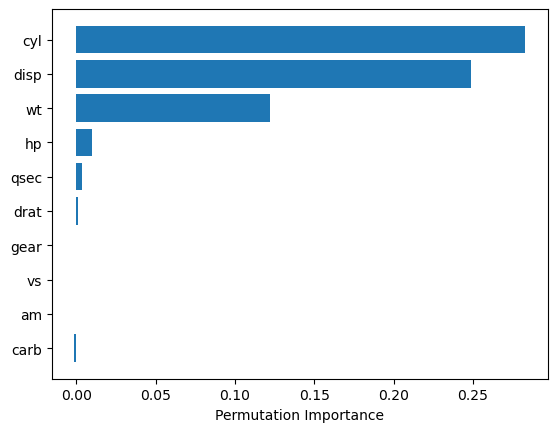

In [23]:

# The second method to compute feature importance uses the permutation method to randomly shuffle each feature 
# and compute the change in the model’s performance. 
# The features which impact the performance the most are the most important ones.

perm_importance = permutation_importance(xgb, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


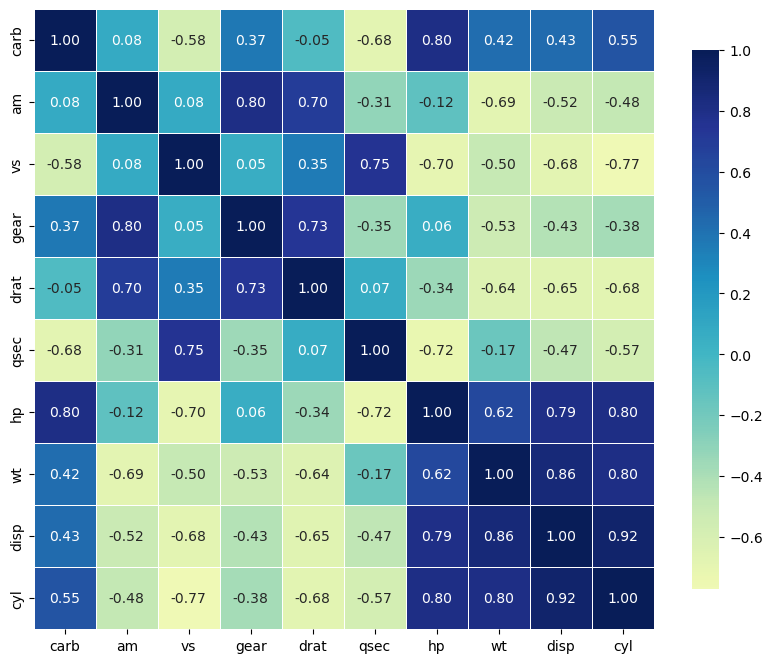

In [13]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X.columns[sorted_idx]])


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


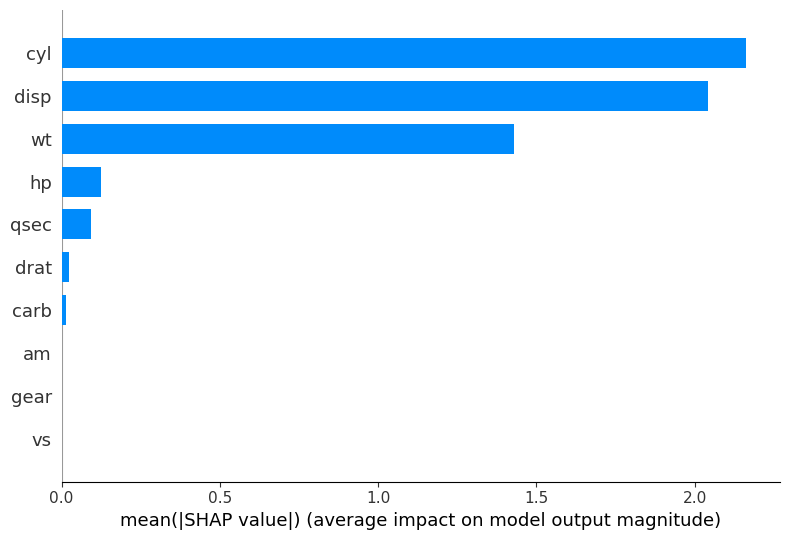

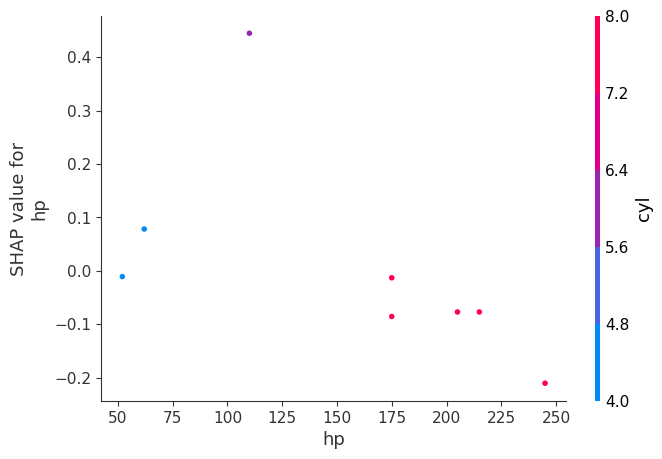

In [21]:

# Feature Importance Computed with SHAP Values
# The third method to compute feature importance in Xgboost is to use SHAP package. It is model-agnostic and 
# using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.dependence_plot("hp", shap_values, X_test)

# RandomForest Feature importance
# https://mljar.com/blog/feature-importance-in-random-forest/